<a href="https://colab.research.google.com/github/yashasvi000/PRODIGY_DS_03/blob/main/Task_ds_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Step 1: Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Read the dataset (semicolon separated)
df = pd.read_csv("bank-additional-full.csv", sep=';')

print("Shape:", df.shape)
df.head()

Shape: (41188, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
# Step 2: Inspect target variable & missing values
print("Columns:", df.columns.tolist())
print("\nTarget distribution:")
print(df['y'].value_counts(normalize=True) * 100)

print("\nMissing values per column:")
print(df.isnull().sum())

Columns: ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']

Target distribution:
y
no     88.734583
yes    11.265417
Name: proportion, dtype: float64

Missing values per column:
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [4]:
# Step 3: Replace "unknown" with NaN, then fill them
df_clean = df.replace('unknown', np.nan)

# Fill categorical NaNs with mode, numeric with median
for col in df_clean.columns:
    if df_clean[col].isnull().sum() > 0:
        if df_clean[col].dtype == 'object':
            df_clean[col] = df_clean[col].fillna(df_clean[col].mode()[0])
        else:
            df_clean[col] = df_clean[col].fillna(df_clean[col].median())

# Drop "duration" (known only after call ends → data leakage)
if 'duration' in df_clean.columns:
    df_clean = df_clean.drop(columns=['duration'])

df_clean.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
# Step 4: One-hot encode categorical features
X = df_clean.drop(columns=['y'])
y = df_clean['y'].map({'yes':1, 'no':0})

X = pd.get_dummies(X, drop_first=True)

print("Feature shape after encoding:", X.shape)

Feature shape after encoding: (41188, 46)


In [6]:
# Step 5: Split into train & test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

Train shape: (32950, 46) Test shape: (8238, 46)


In [7]:
# Step 6: Train Decision Tree
dt = DecisionTreeClassifier(max_depth=6, random_state=42, class_weight='balanced')
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8336974993930566
Precision: 0.36638452237001207
Recall: 0.6530172413793104
F1 Score: 0.4694035631293571

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.86      0.90      7310
           1       0.37      0.65      0.47       928

    accuracy                           0.83      8238
   macro avg       0.66      0.75      0.69      8238
weighted avg       0.89      0.83      0.85      8238



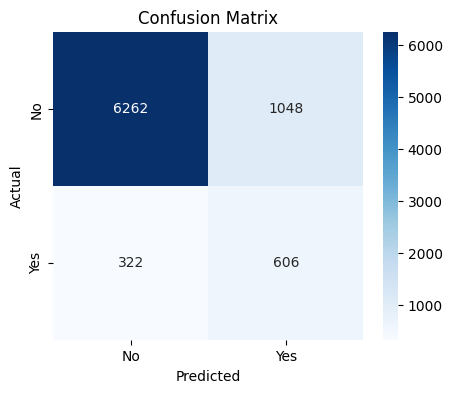

In [8]:
# Step 7: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No','Yes'], yticklabels=['No','Yes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

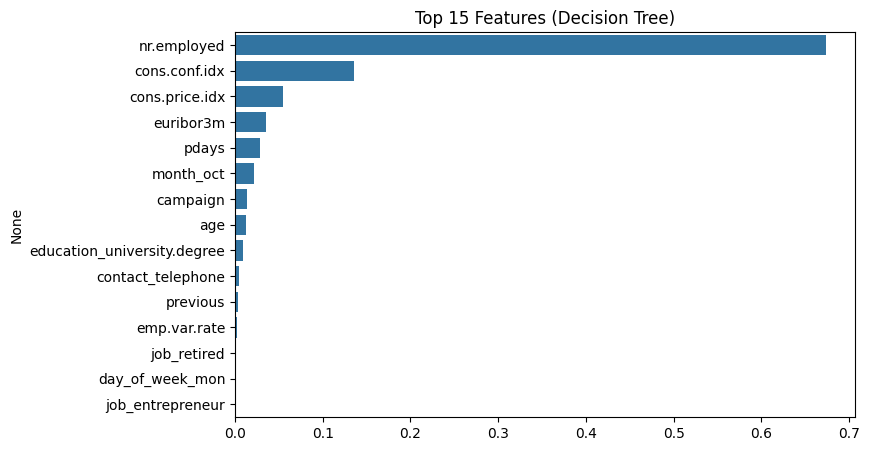

In [9]:
# Step 8: Feature Importance
feat_imp = pd.Series(dt.feature_importances_, index=X.columns).sort_values(ascending=False).head(15)
plt.figure(figsize=(8,5))
sns.barplot(x=feat_imp.values, y=feat_imp.index)
plt.title("Top 15 Features (Decision Tree)")
plt.show()

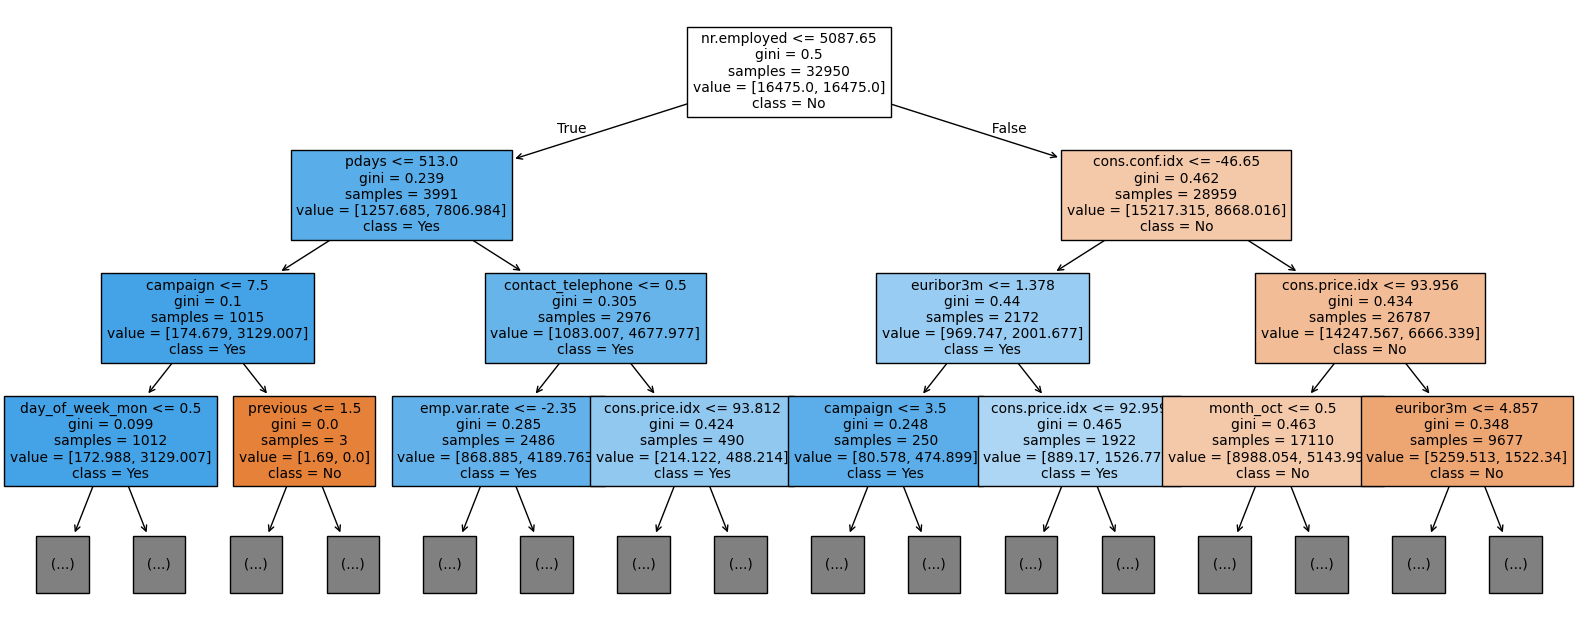

In [14]:
from sklearn import tree

plt.figure(figsize=(20,8))
tree.plot_tree(dt, feature_names=X.columns, class_names=['No','Yes'], filled=True, max_depth=3, fontsize=10)
plt.show()


In [15]:
import joblib

# Save trained model
joblib.dump(dt, "decision_tree_bank.pkl")

# Save predictions
results = X_test.copy()
results['y_true'] = y_test.values
results['y_pred'] = y_pred
results.to_csv("bank_test_predictions.csv", index=False)

print("Files saved: decision_tree_bank.pkl, bank_test_predictions.csv")

Files saved: decision_tree_bank.pkl, bank_test_predictions.csv
